In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.sparse import coo_matrix
from IPython.display import clear_output
import time

In [2]:
import imageio

In [3]:
#Crea el mundo
n_gridR = 50
mundo = np.zeros((n_gridR, n_gridR))
recompensas = -np.ones((n_gridR, n_gridR))
#recompensas[154:157, 154:157] = np.ones( (3,3) )
gamma = 0.8
recompensas[30:33, 20:23] = 3*np.ones( (3,3) )

In [274]:
## Parche indeceado
numProhibido = int(0.05*(n_gridR**2))+1

def newRand(origen):
    pasos =  [[1,0], [-1,0], [0,1], [0,-1]]
    return origen + np.array(pasos[np.random.choice(np.arange(4))])


def add_prohibido(recompensas, puntoNuevo):
    x,y = puntoNuevo
    if recompensas[x,y]==-1 or recompensas[x,y]==1:
        return recompensas, 0
    
    elif recompensas[x,y]==0:
        recompensas[x,y]=-1
        return recompensas, 1
    
counter = 0
orig = np.array([30,40])
prohibs = [orig]
while counter<numProhibido:
    
    newRPoint = newRand(prohibs[np.random.choice(np.arange(len(prohibs)))])
    recompensas, entro = add_prohibido(recompensas, newRPoint)
    
    if entro==1:
        prohibs.append(newRPoint)
        counter+=1

KeyboardInterrupt: 

In [4]:
numProhibido2 = int(np.sqrt(0.05*(n_gridR**2)))
recompensas[10:10+numProhibido2,15:15+numProhibido2]= -3*np.ones((numProhibido2, numProhibido2))

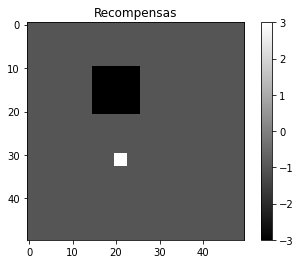

In [28]:
imgplot = plt.imshow(recompensas, cmap='gray')
plt.colorbar()
plt.title("Recompensas")
plt.show()

In [328]:
numProhibido2**2/(n_gridR**2)

0.0484

In [6]:
def evolucion_temporal(estado, accion):
    """
    Identificamos 'u' con 0, 'd' con 1, 'l' con 2 y 'r' con 3
    """
    n_grid = n_gridR-1
    x,y = estado
    
    if accion == 0:
        sig_pasos = [[x,min(y+1, n_grid)], [x, min(y+2, n_grid)], [max(x-1,0), min(y+2, n_grid)], [max(x-1, 0), min(y+1, n_grid)]]
        sig_paso = sig_pasos[np.random.choice(np.arange(4), 1, p = [0.3, 0.4, 0.2, 0.1])[0]]
    
    elif accion == 1:
        sig_pasos = [ [x,y], [x, max(y-1, 0)], [max(x-1,0), y], [max(x-1,0), max(y-1,0)] ]
        sig_paso = sig_pasos[np.random.choice(np.arange(4), 1, p = [0.3, 0.3, 0.2, 0.2])[0]]
    
    elif accion == 2:
        sig_pasos = [ [max(x-1,0), min(y+1, n_grid)], [max(x-1, 0), y], [max(x-2,0), y], [max(x-2,0), min(y+1, n_grid)] ]
        sig_paso = sig_pasos[np.random.choice(np.arange(4), 1, p = [0.3, 0.2, 0.3, 0.2])[0]]
    
    elif accion == 3:
        sig_pasos = [[min(x+1, n_grid), y], [min(x+1, n_grid), min(y+1, n_grid)], [x,y], [x, min(y+1, n_grid)]]
        sig_paso = sig_pasos[np.random.choice(np.arange(4), 1, p = [0.3, 0.4, 0.2, 0.1])[0]]
    
#     elif accion == 4:
#         sig_paso = estado
        
    return sig_paso

In [7]:
def probTransition(estado1, estado2, accion):
    """
    Prob de pasar de estado1 a estado2
    """
    n_grid = n_gridR-1
    prob = 0
    x,y = estado1
    if accion == 0:
        sig_pasos = [[x,min(y+1, n_grid)], [x, min(y+2, n_grid)], [max(x-1,0), min(y+2, n_grid)], [max(x-1, 0), min(y+1, n_grid)]]
        probs = [0.3, 0.4, 0.2, 0.1]
        if estado2 in sig_pasos:
            prob = probs[sig_pasos.index(estado2)]
    
    elif accion == 1:
        sig_pasos = [ [x,y], [x, max(y-1, 0)], [max(x-1,0), y], [max(x-1,0), max(y-1,0)] ]
        probs = [0.3, 0.4, 0.2, 0.1]
        if estado2 in sig_pasos:
            prob = probs[sig_pasos.index(estado2)]
    
    elif accion == 2:
        sig_pasos = [[max(x-1,0), min(y+1, n_grid)], [max(x-1, 0), y], [max(x-2,0), y], [max(x-2,0), min(y+1, n_grid)]]
        probs = [0.3, 0.2, 0.3, 0.2]
        if estado2 in sig_pasos:
            prob = probs[sig_pasos.index(estado2)]
    
    elif accion == 3:
        sig_pasos = [[min(x+1, n_grid), y], [min(x+1, n_grid), min(y+1, n_grid)], [x,y], [x, min(y+1, n_grid)]]
        probs = [0.3, 0.4, 0.2, 0.1]
        if estado2 in sig_pasos:
            prob = probs[sig_pasos.index(estado2)]
            
#     elif accion == 4:
#         prob = 1
    return prob

In [8]:
def posiblesEstadosSiguientes(estado,accion):
    n_grid = n_gridR-1
    x,y = estado
    
    if accion == 0:
        sig_pasos = [[x,min(y+1, n_grid)], [x, min(y+2, n_grid)], [max(x-1,0), min(y+2, n_grid)], [max(x-1, 0), min(y+1, n_grid)]]
    
    elif accion == 1:
        sig_pasos = [ [x,y], [x, max(y-1, 0)], [max(x-1,0), y], [max(x-1,0), max(y-1,0)] ]
        
    elif accion == 2:
        sig_pasos = [ [max(x-1,0), min(y+1, n_grid)], [max(x-1, 0), y], [max(x-2,0), y], [max(x-2,0), min(y+1, n_grid)] ]
    
    elif accion == 3:
        sig_pasos = [[min(x+1, n_grid), y], [min(x+1, n_grid), min(y+1, n_grid)], [x,y], [x, min(y+1, n_grid)]]

#     elif accion == 4:
#         sig_pasos = [estado]
    return sig_pasos

In [9]:
valueR = np.zeros((n_gridR,n_gridR))
policyR = np.random.randint(4, size=(n_gridR, n_gridR))
#policyR = np.zeros((n_gridR,n_gridR))

## Policy Iteration

In [10]:
## Value update

def valUpdate(valueK, policy):
    value = np.copy(valueK)
    for i in range(n_gridR):
        for j in range(n_gridR):
            value[i,j] =  np.sum([probTransition([i,j], nextE, policy[i,j])*(recompensas[i,j] + gamma*value[helpp(nextE)]) for nextE in posiblesEstadosSiguientes([i,j], policy[i,j])]  )
    value[value > 30] = 30
    value[value < -30] = -30
    return value

## Policy update

def policyUpdate(value, policyK):
    policy = np.copy(policyK)
    for i in range(n_gridR):
        for j in range(n_gridR):
            policy[i,j] = np.argmax([np.sum([probTransition([i,j], nextE, acc)*(value[helpp(nextE)]*gamma + recompensas[i,j]) for nextE in posiblesEstadosSiguientes([i,j], acc)]) for acc in range(4) ])      
    return policy

In [11]:
def helpp(x):
    p,pp = x
    return p,pp



Pold - Pnew:  0 
Iteration:  55


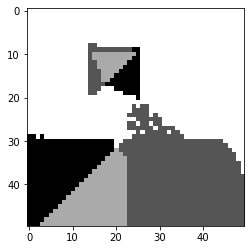

In [12]:
p = 100
it = 0
pngs = []
while p>0 and it<100:
    
    it+=1
    pp = 1
    while pp>1e-4:
        valueNew = valUpdate(valueR, policyR)
        pp = 0
        diff =np.abs(valueNew-valueR)
        pp = np.sum(np.sum(diff))
        valueR = valueNew
#         clear_output(wait=True)
#         plt.imshow(np.rot90(valueR), cmap='gray')
#         plt.show()
#         time.sleep(0.01)
        
    policyNueva = policyUpdate(valueR, policyR)
    
    p = 0 
    diffP = np.abs(policyR-policyNueva)
    diffP[ diffP>0] =1
    p = np.sum(np.sum(diffP))
    policyR = policyNueva
    
    clear_output(wait=True)
    print("Pold - Pnew: ", p, "\nIteration: ", it)
    
    fig = plt.imshow(policyR, cmap='gray')
    #plt.imshow(fig)
    plt.show()
    time.sleep(0.01)
    
#     filename = "Iteration{iterati}.png".format(iterati=it)
#     plt.imsave(filename, fig)
#     pngs.append(filename)
    
# images = []
# for png in pngs:
#     img = imageio.imread(png)
#     images.append(img)
# imageio.mimsave('temp.gif', images)

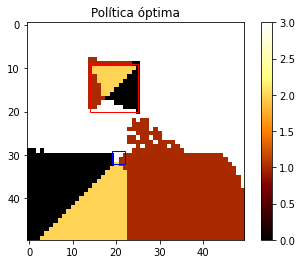

In [25]:
plt.title("Política óptima")
plt.imshow(policyNueva, cmap='afmhot')
plt.colorbar()
ax = plt.gca()
rect = matplotlib.patches.Rectangle((20-1,30-1),3,3,linewidth=1,edgecolor='b',facecolor='none')        # Add the patch to the Axes
rect2 = matplotlib.patches.Rectangle((15-1,10-1),numProhibido2,numProhibido2,linewidth=1,edgecolor='r',facecolor='none')  
ax.add_patch(rect)
ax.add_patch(rect2)
plt.show()

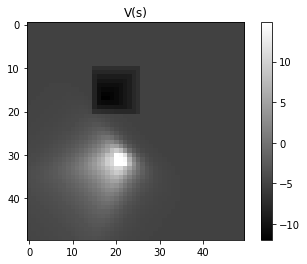

In [19]:
plt.title("V(s)")
plt.imshow(valueR, cmap='gray')
plt.colorbar()
plt.show()

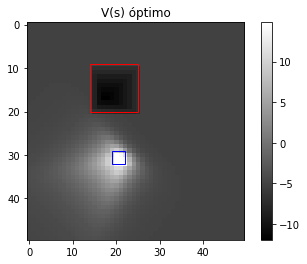

In [21]:
plt.title("V(s) óptimo")
plt.imshow(valueR,cmap='gray')
plt.colorbar()

ax = plt.gca()
rect = matplotlib.patches.Rectangle((20-1,30-1),3,3,linewidth=1,edgecolor='b',facecolor='none')        # Add the patch to the Axes
rect2 = matplotlib.patches.Rectangle((15-1,10-1),numProhibido2,numProhibido2,linewidth=1,edgecolor='r',facecolor='none')  
ax.add_patch(rect)
ax.add_patch(rect2)

In [337]:
path = np.zeros((n_gridR,n_gridR))


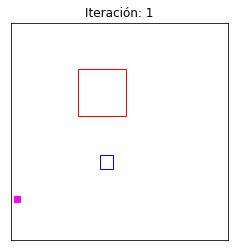

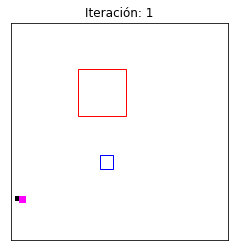

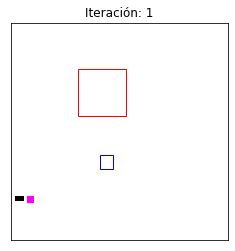

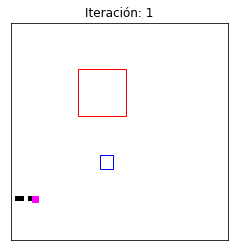

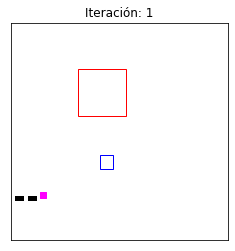

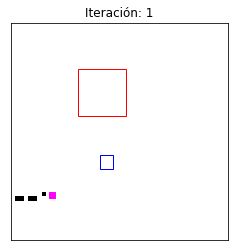

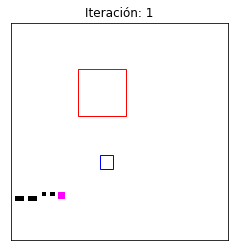

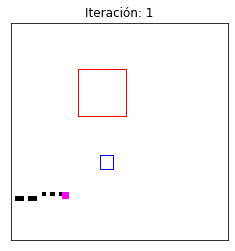

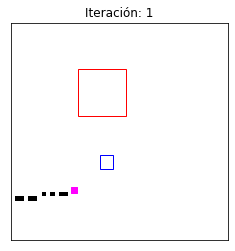

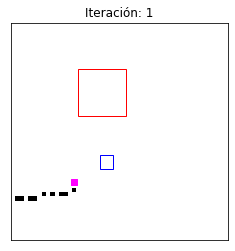

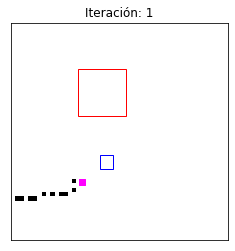

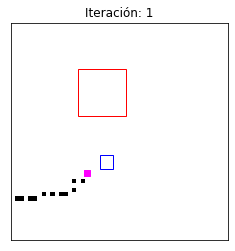

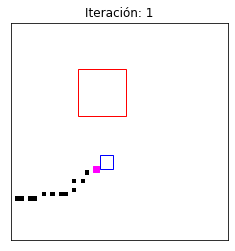

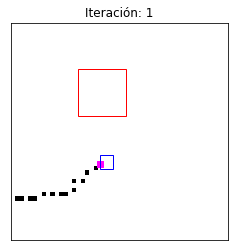

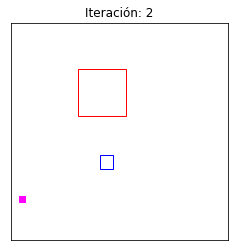

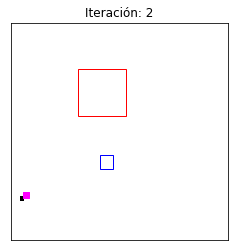

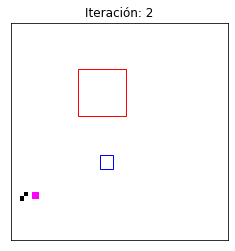

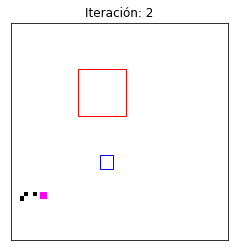

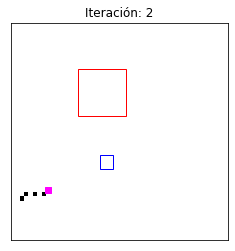

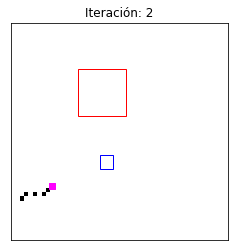

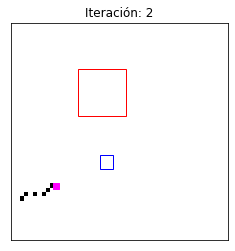

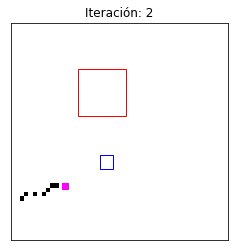

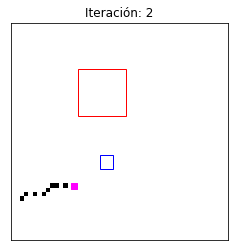

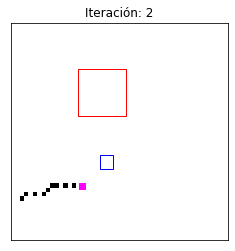

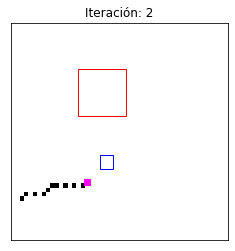

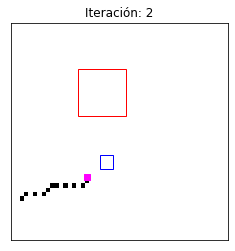

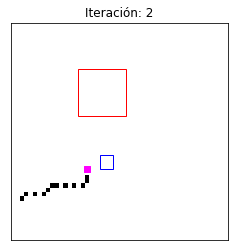

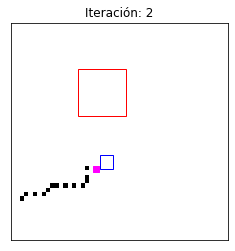

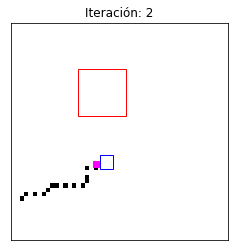

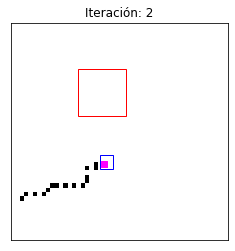

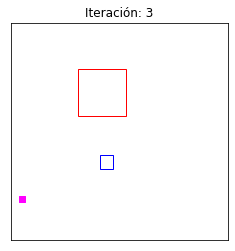

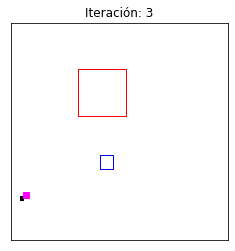

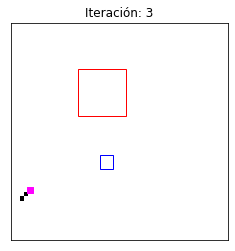

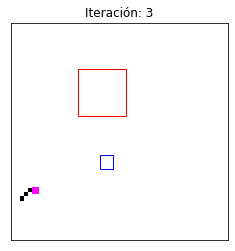

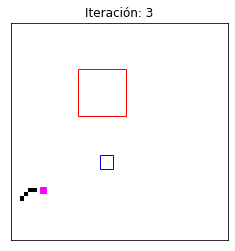

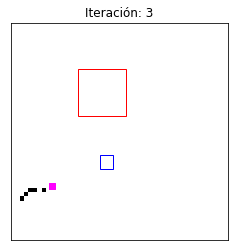

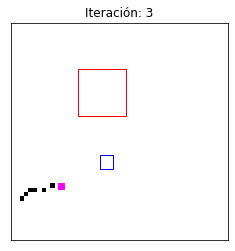

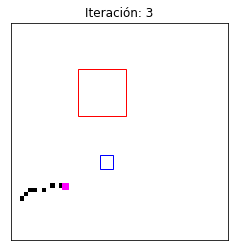

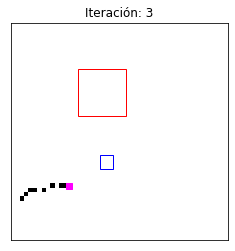

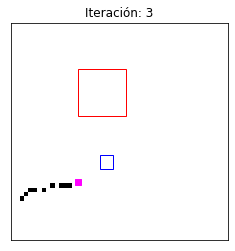

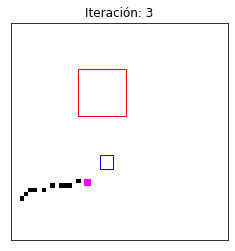

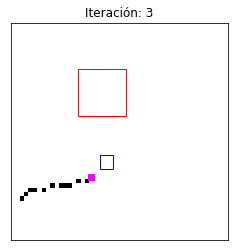

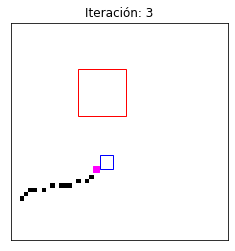

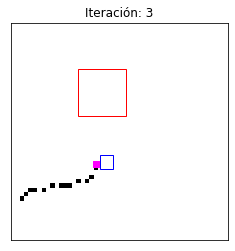

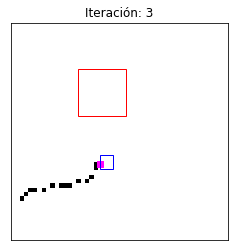

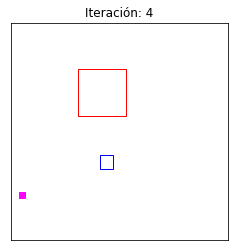

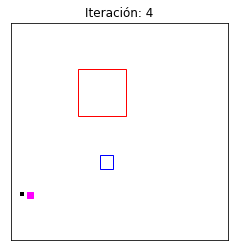

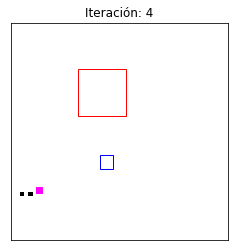

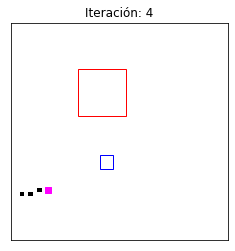

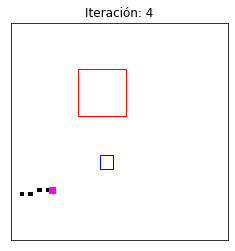

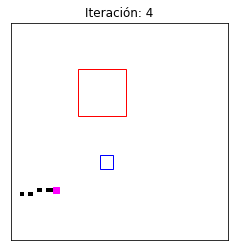

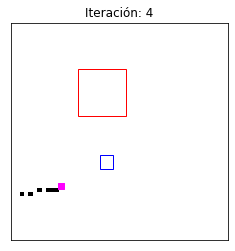

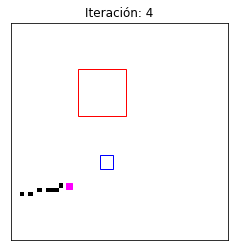

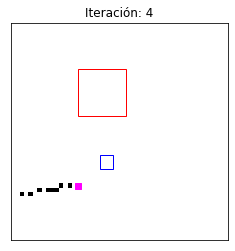

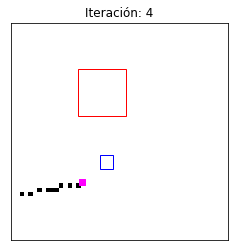

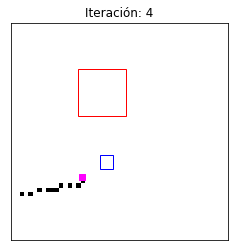

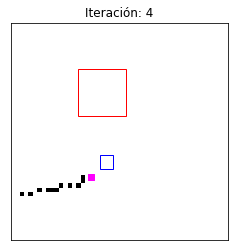

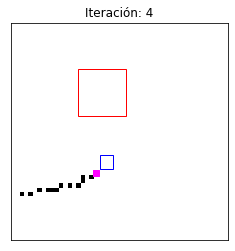

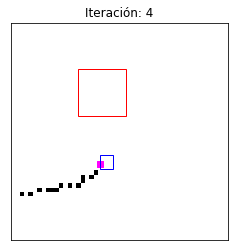

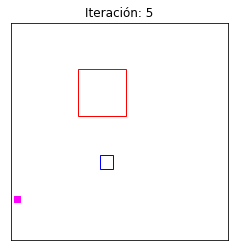

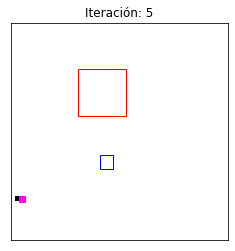

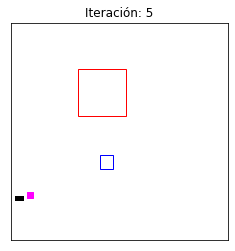

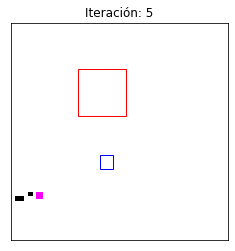

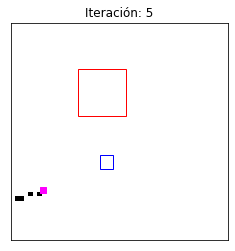

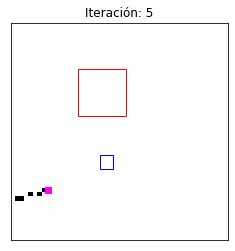

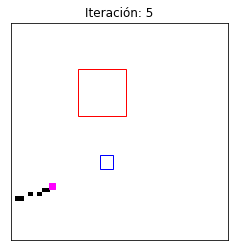

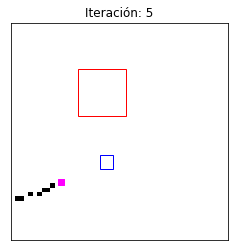

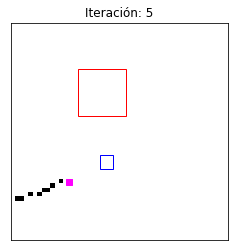

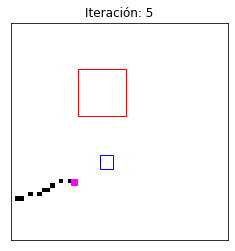

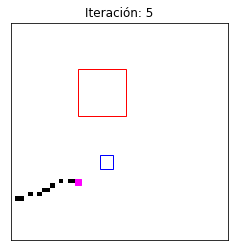

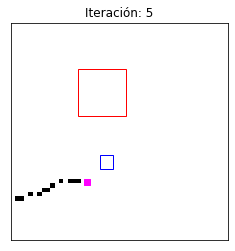

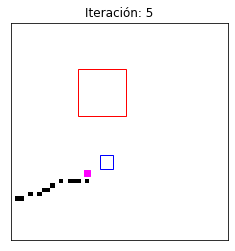

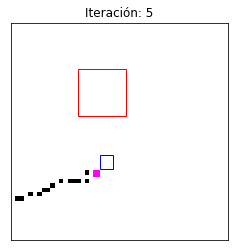

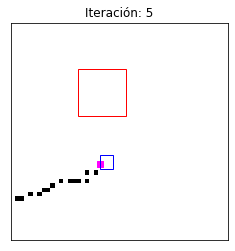

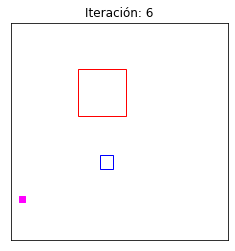

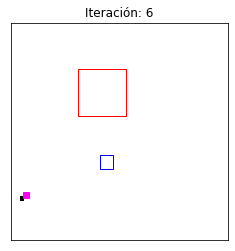

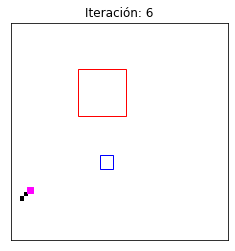

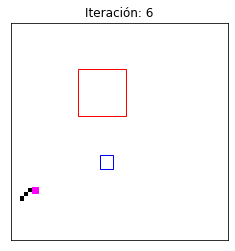

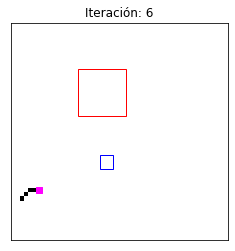

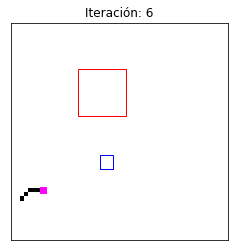

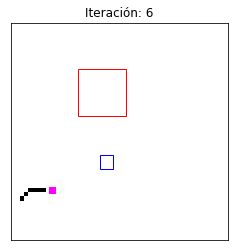

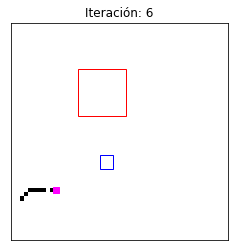

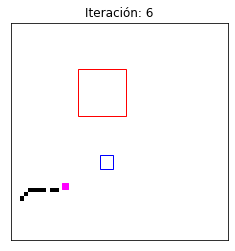

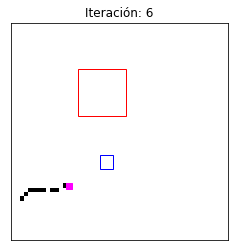

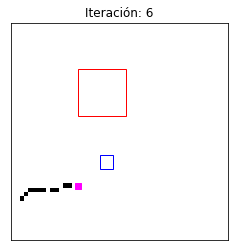

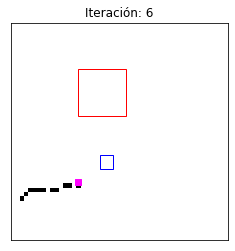

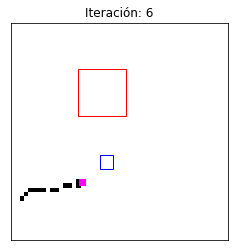

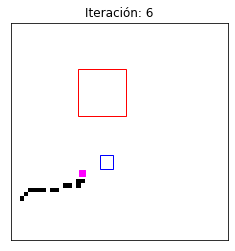

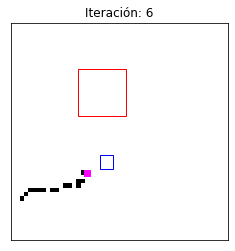

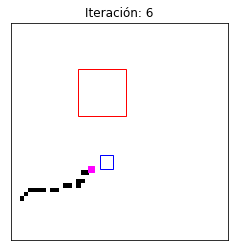

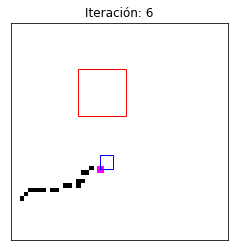

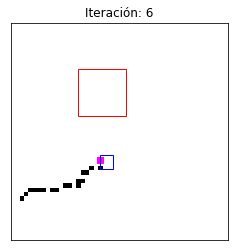

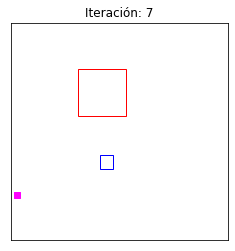

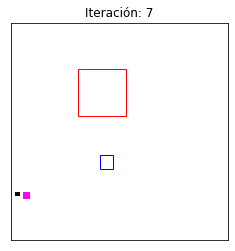

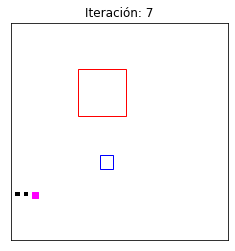

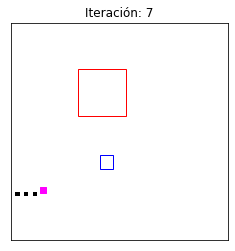

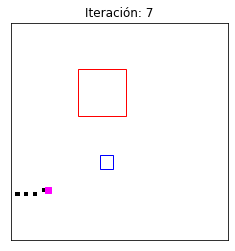

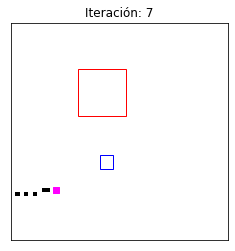

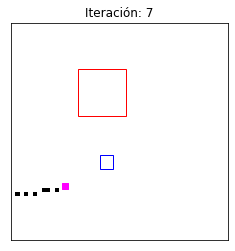

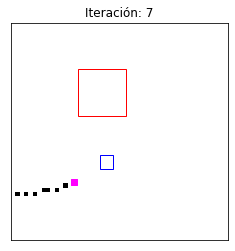

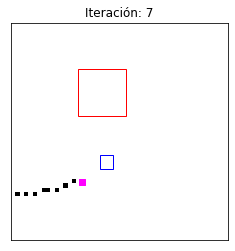

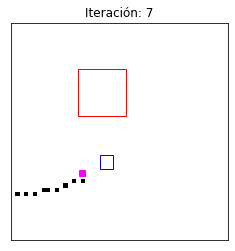

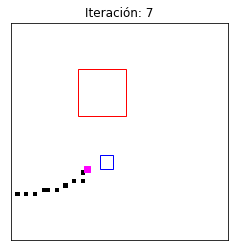

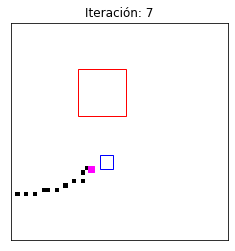

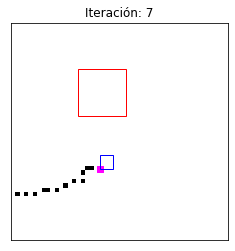

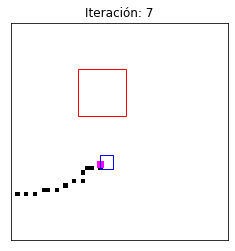

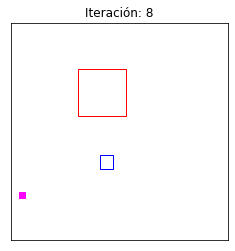

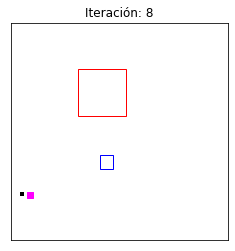

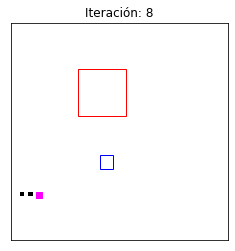

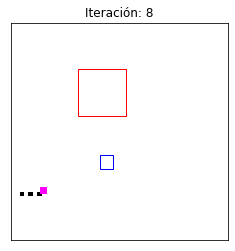

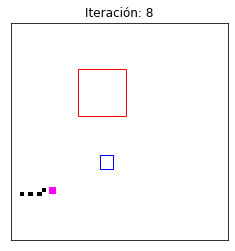

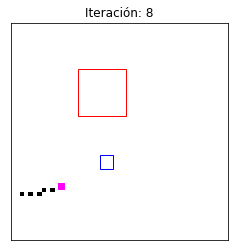

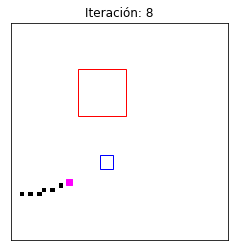

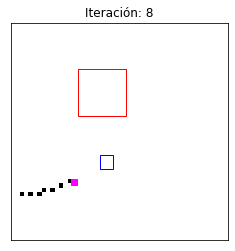

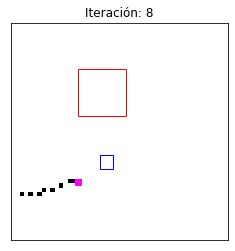

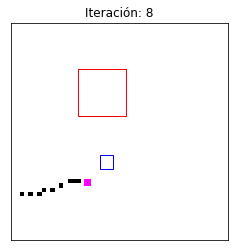

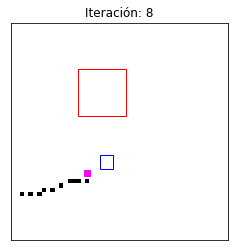

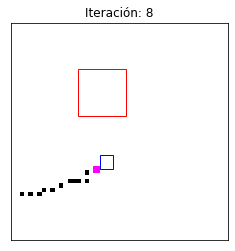

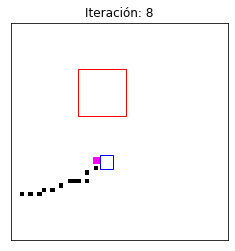

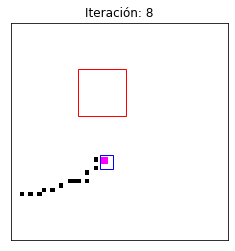

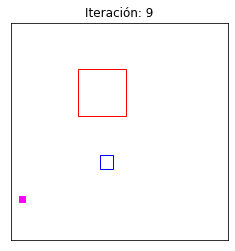

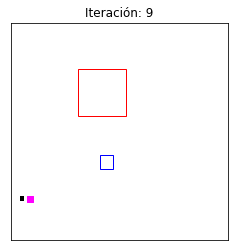

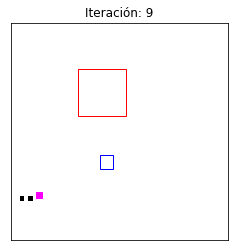

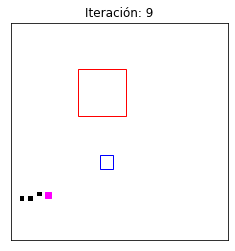

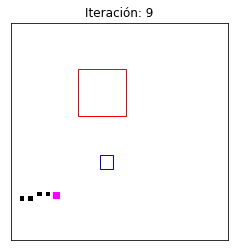

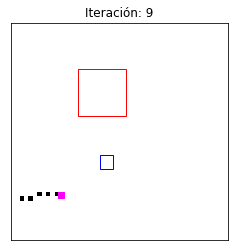

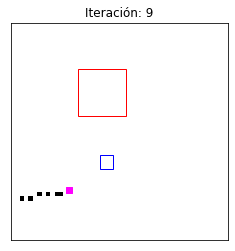

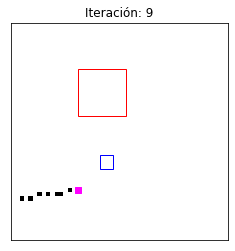

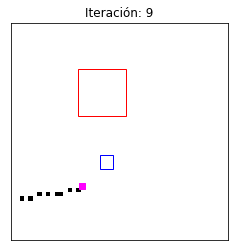

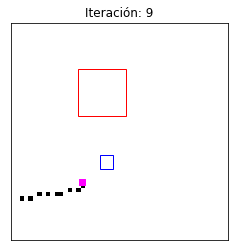

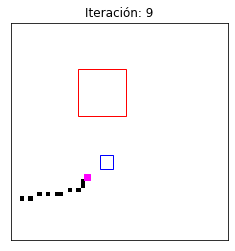

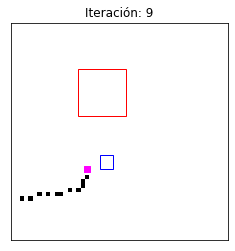

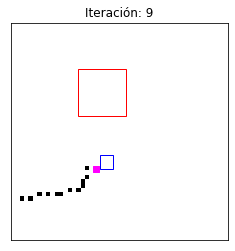

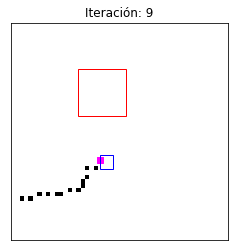

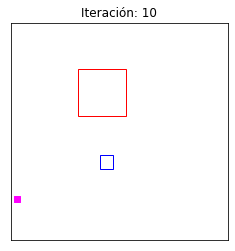

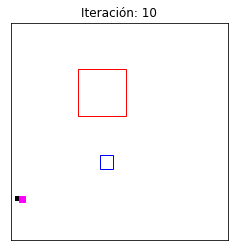

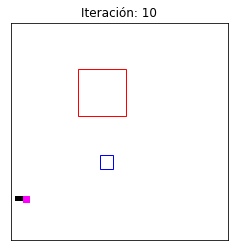

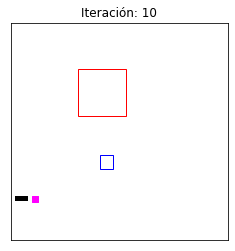

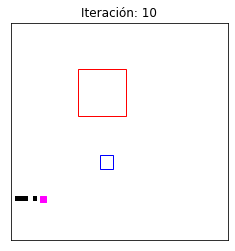

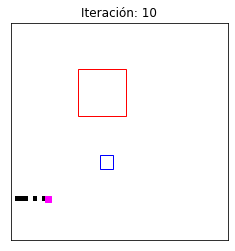

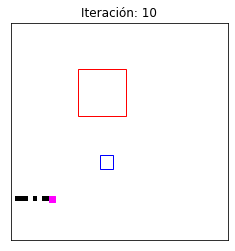

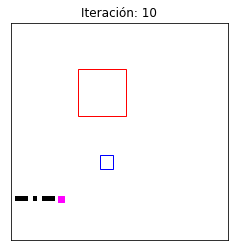

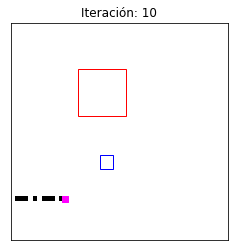

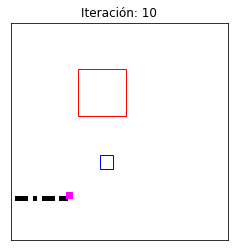

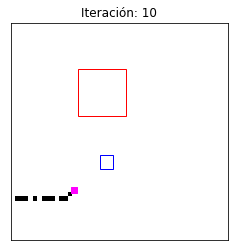

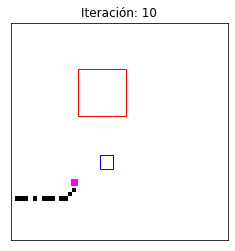

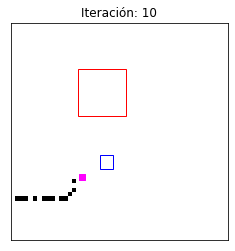

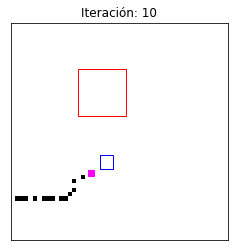

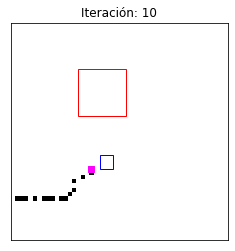

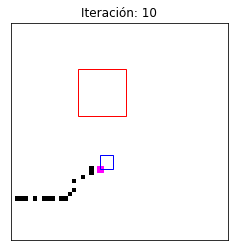

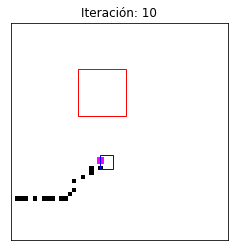

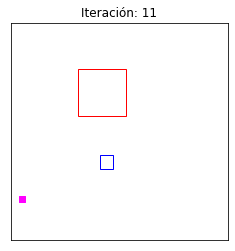

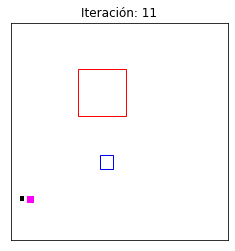

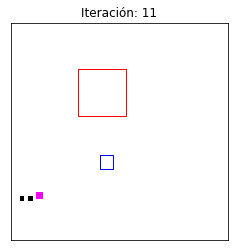

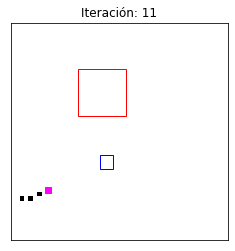

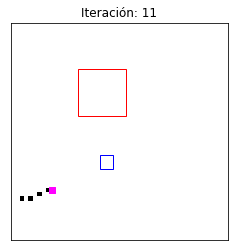

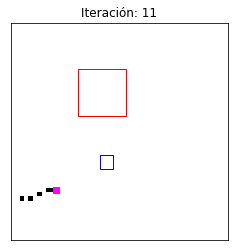

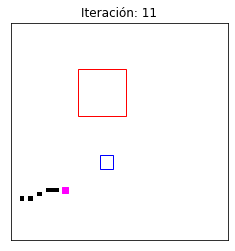

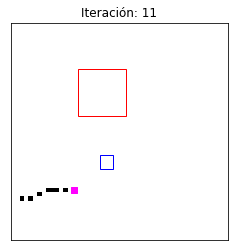

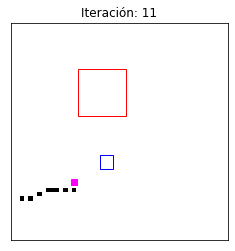

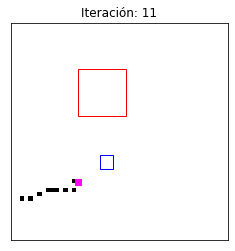

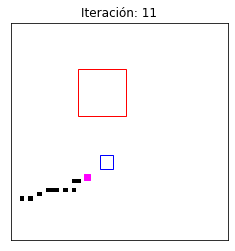

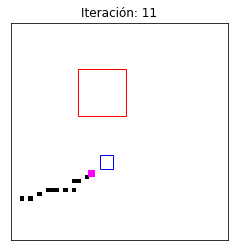

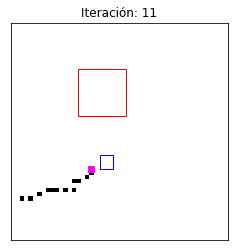

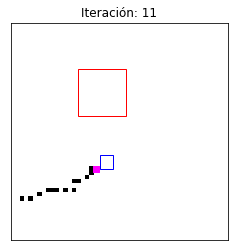

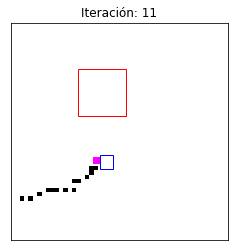

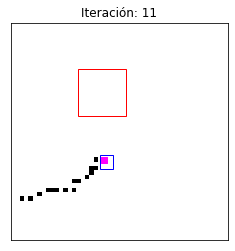

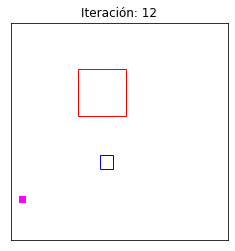

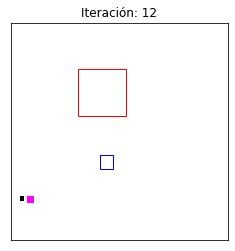

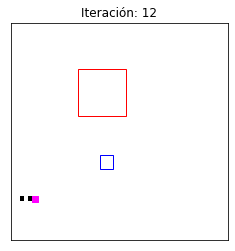

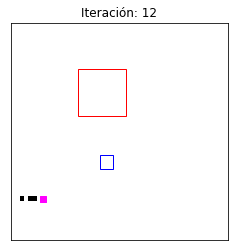

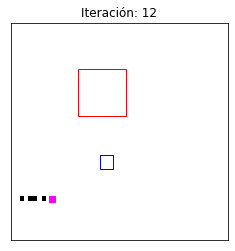

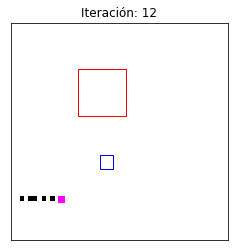

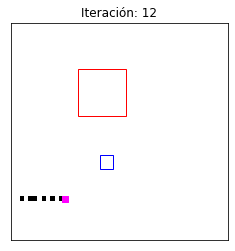

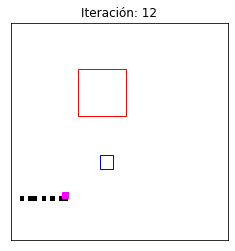

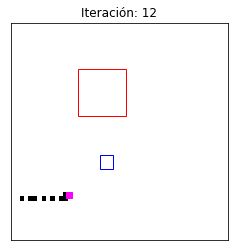

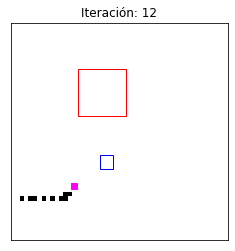

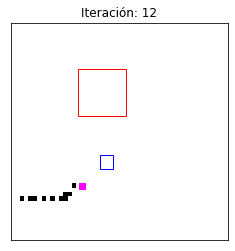

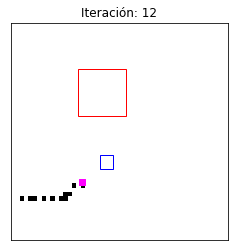

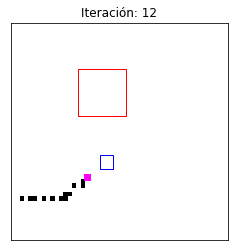

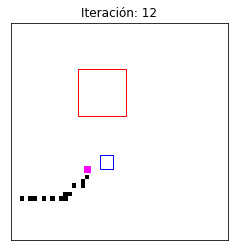

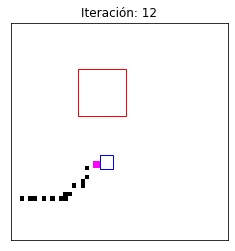

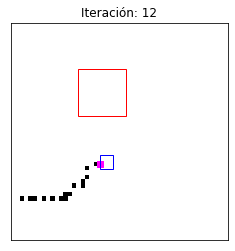

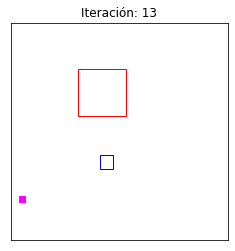

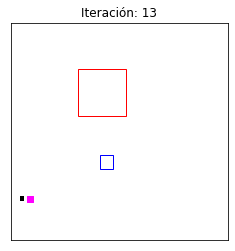

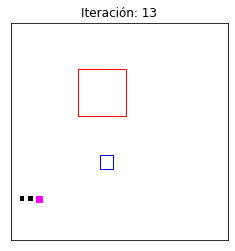

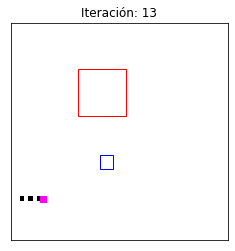

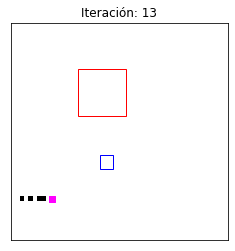

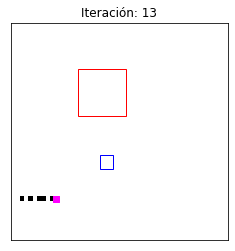

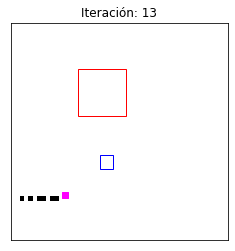

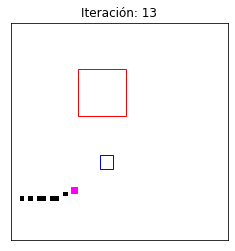

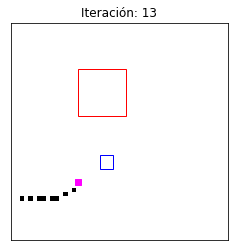

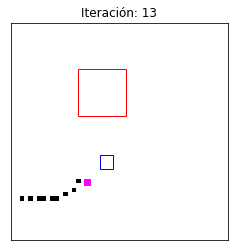

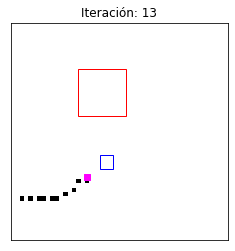

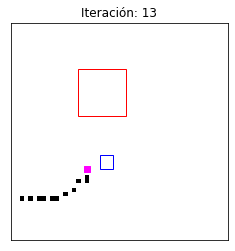

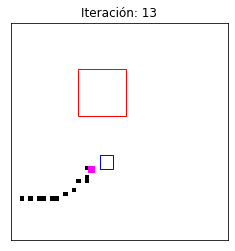

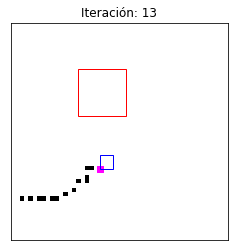

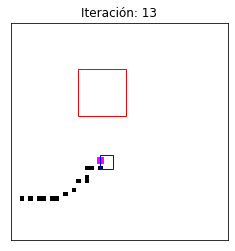

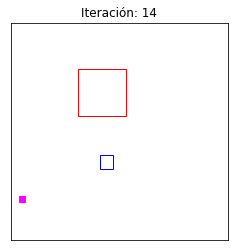

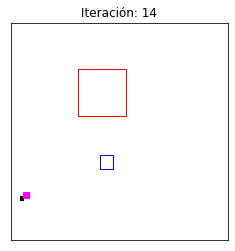

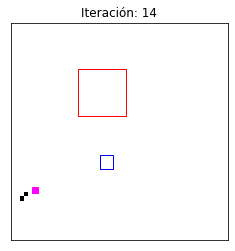

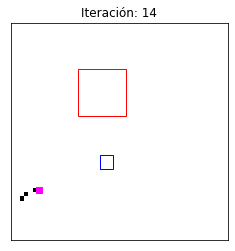

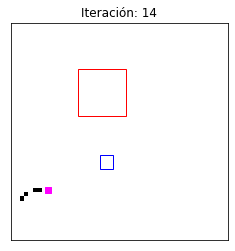

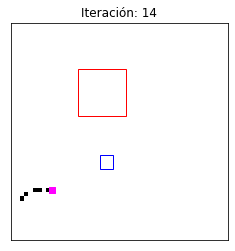

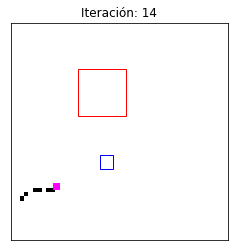

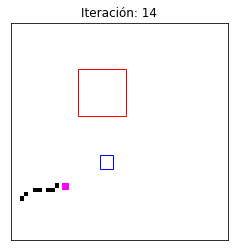

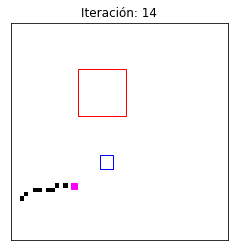

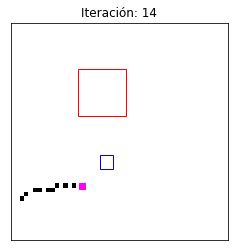

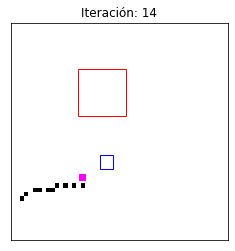

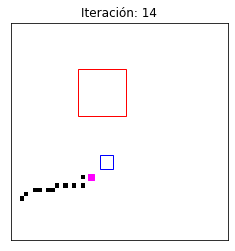

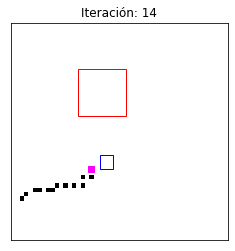

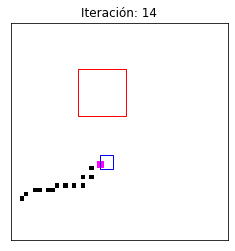

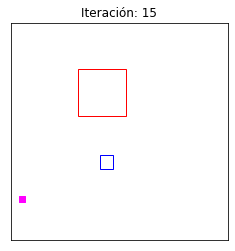

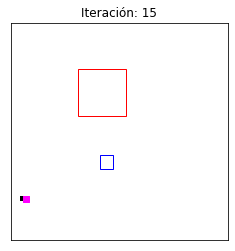

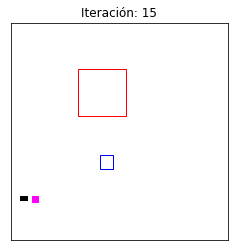

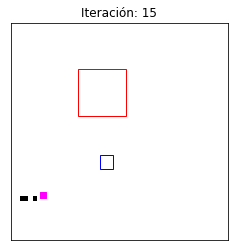

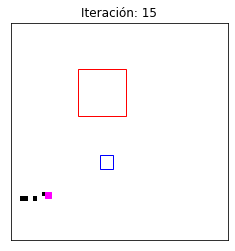

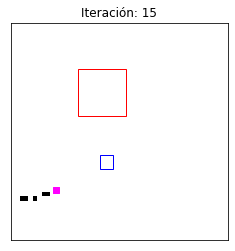

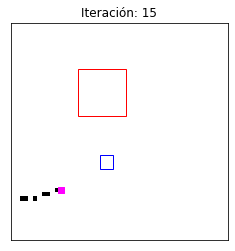

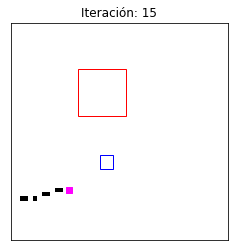

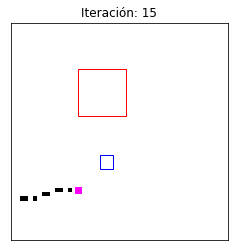

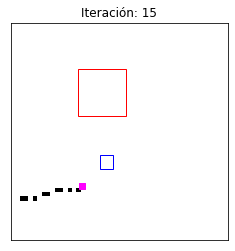

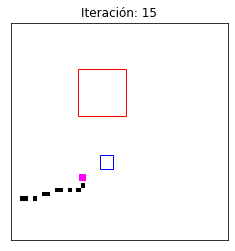

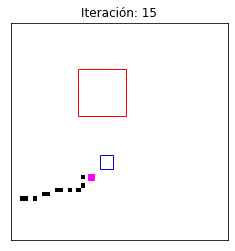

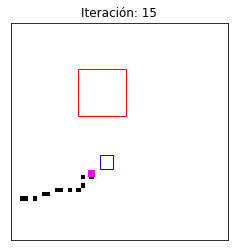

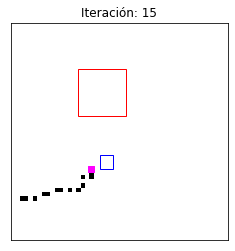

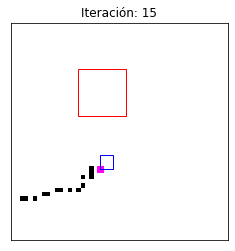

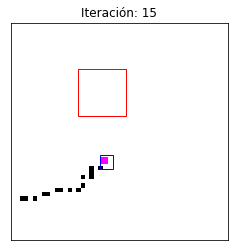

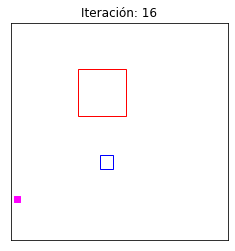

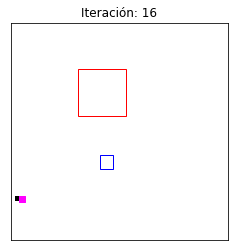

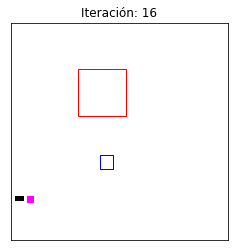

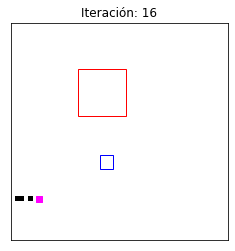

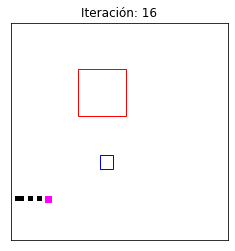

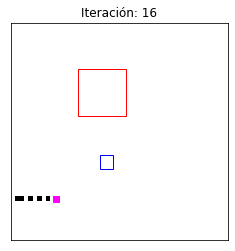

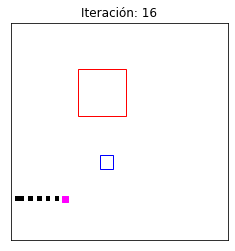

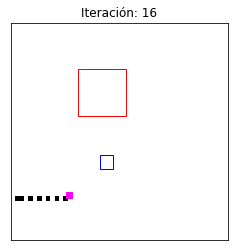

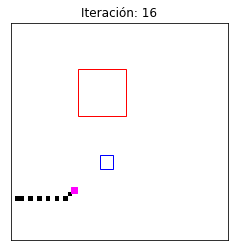

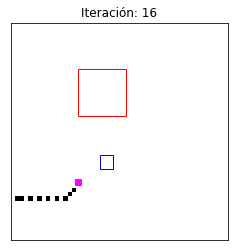

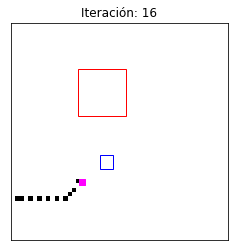

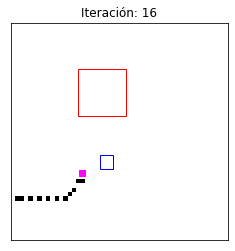

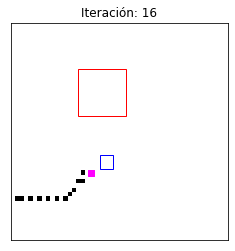

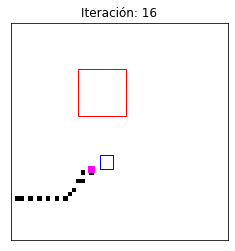

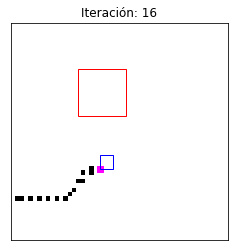

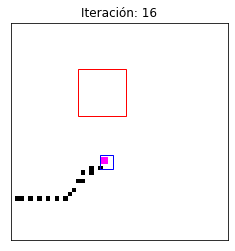

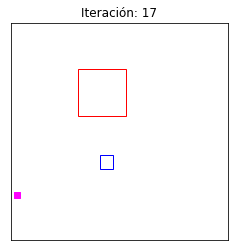

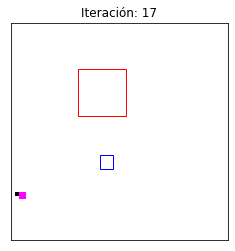

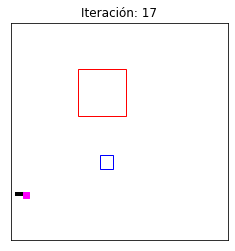

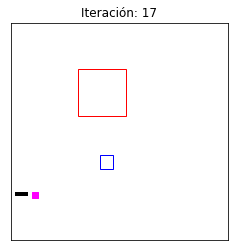

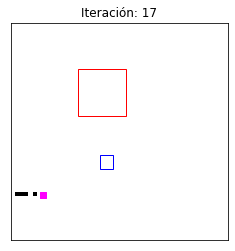

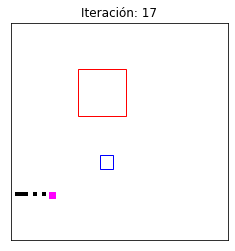

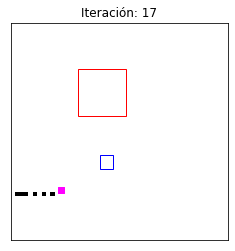

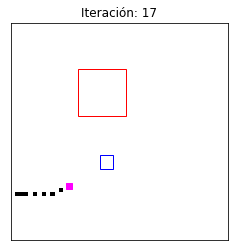

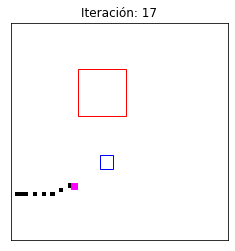

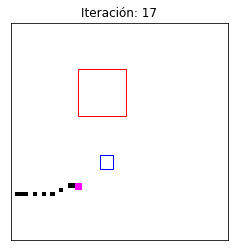

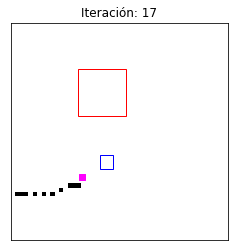

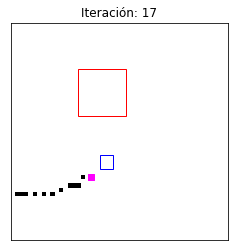

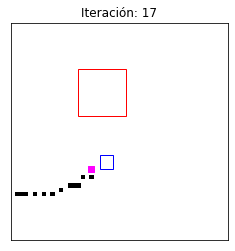

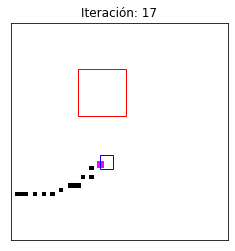

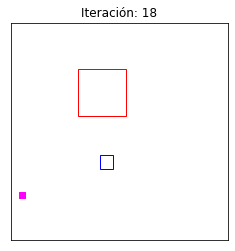

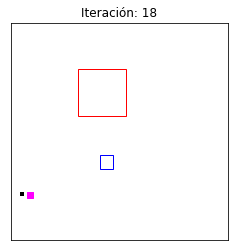

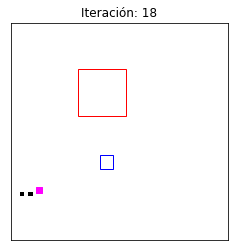

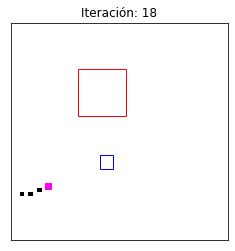

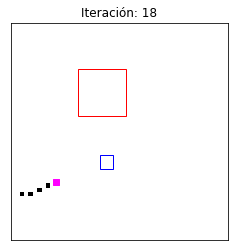

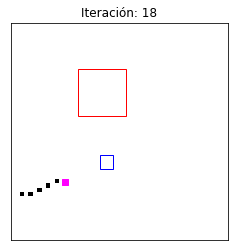

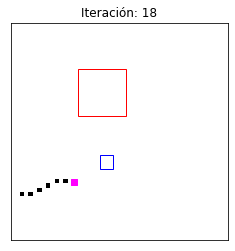

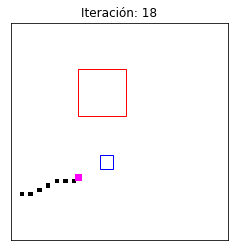

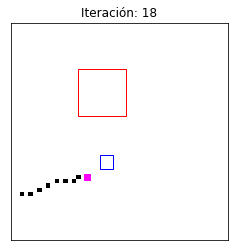

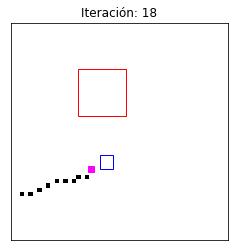

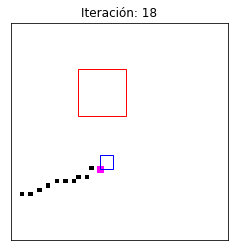

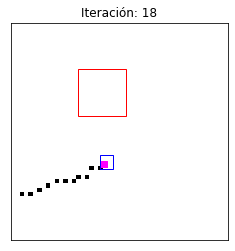

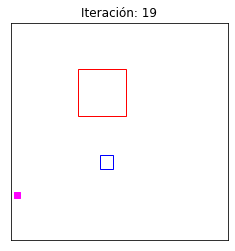

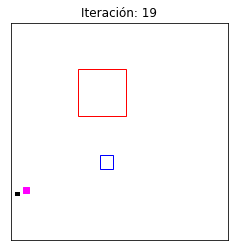

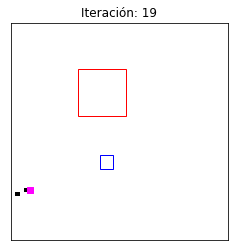

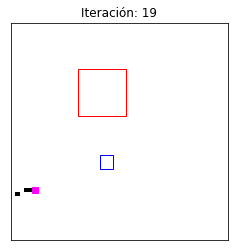

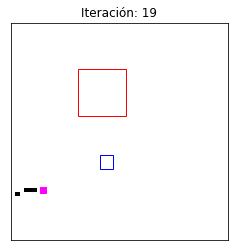

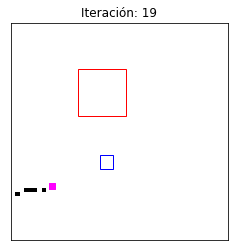

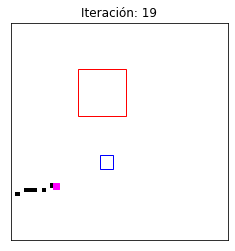

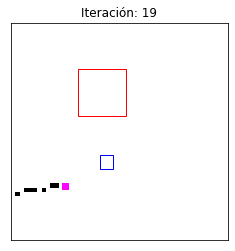

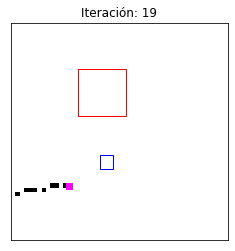

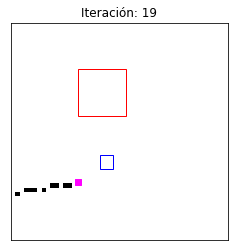

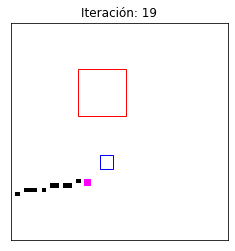

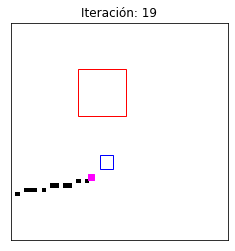

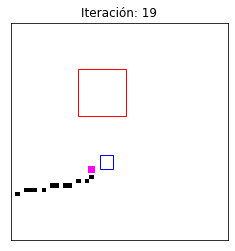

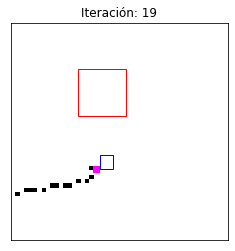

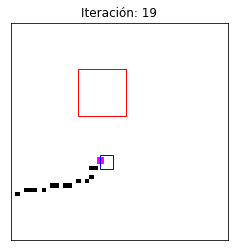

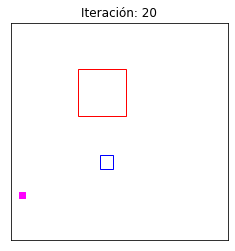

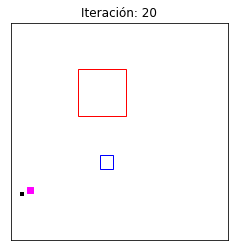

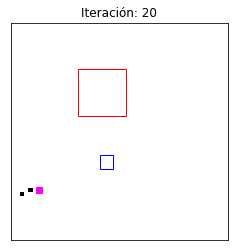

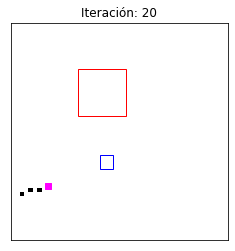

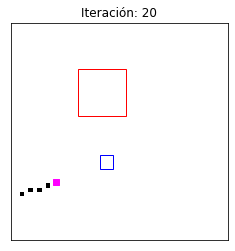

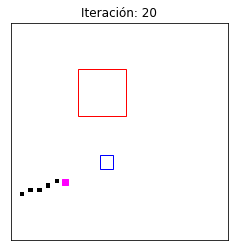

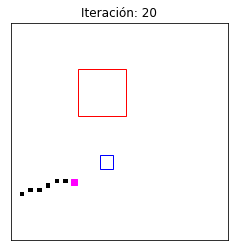

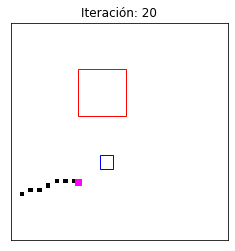

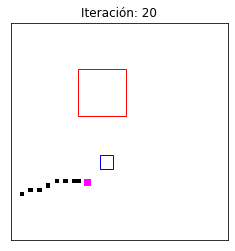

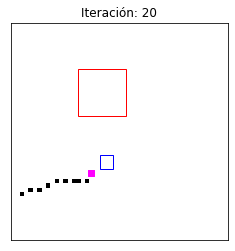

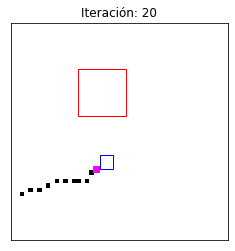

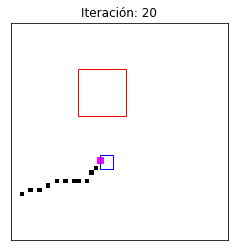

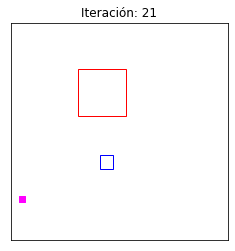

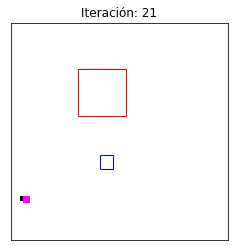

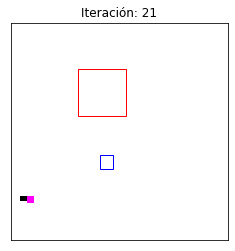

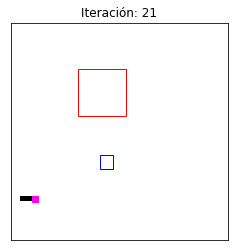

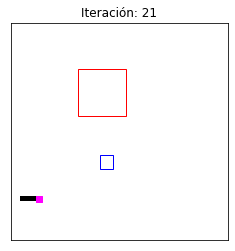

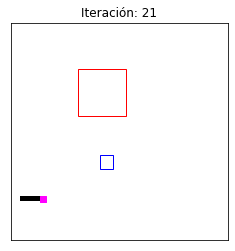

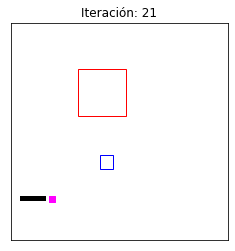

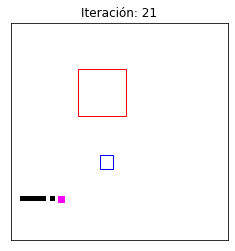

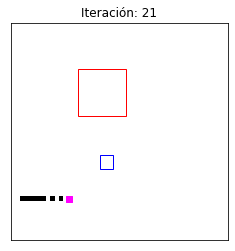

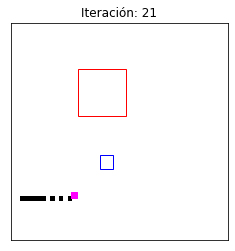

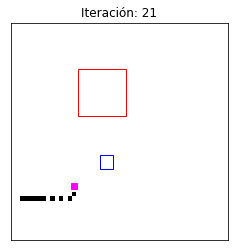

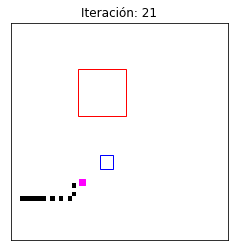

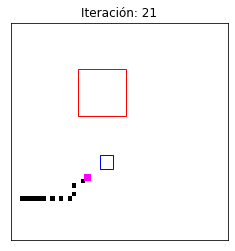

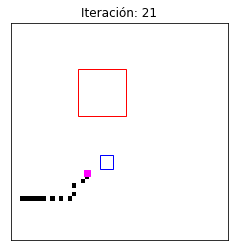

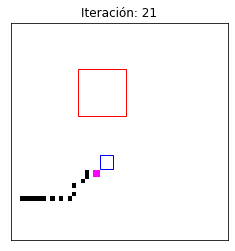

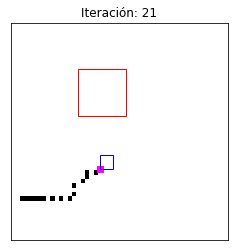

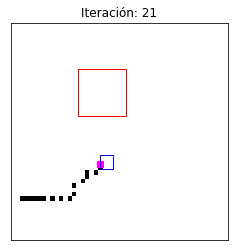

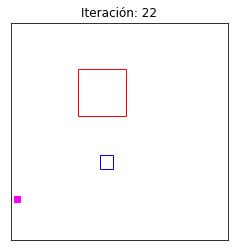

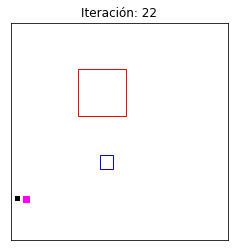

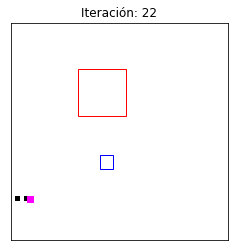

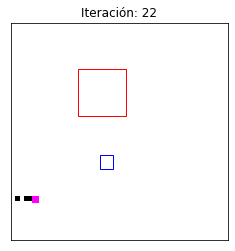

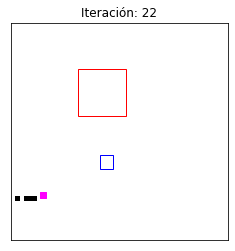

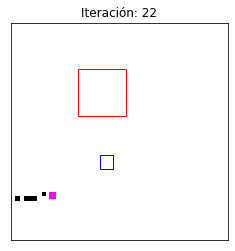

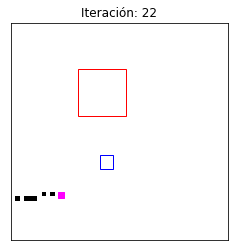

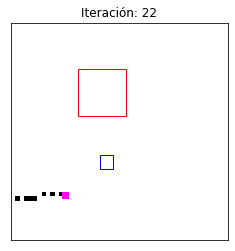

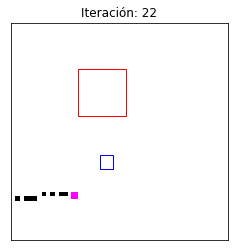

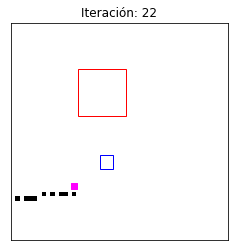

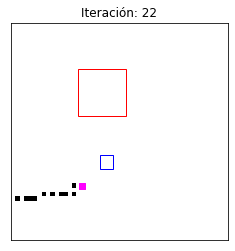

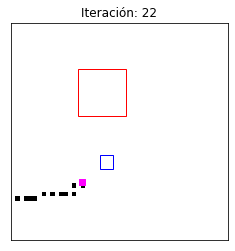

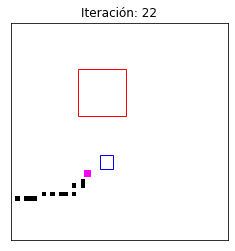

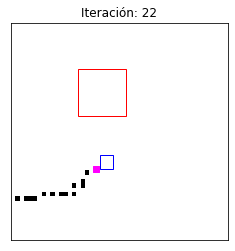

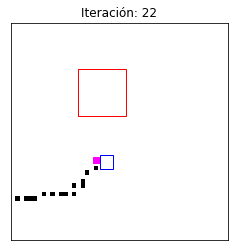

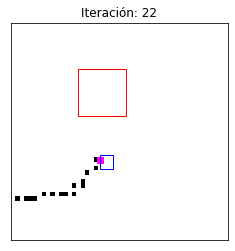

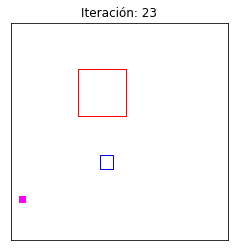

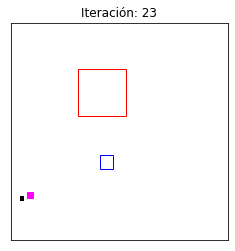

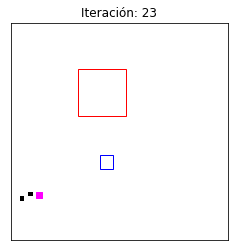

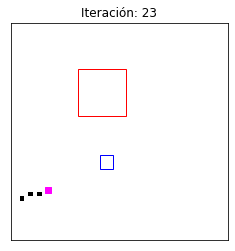

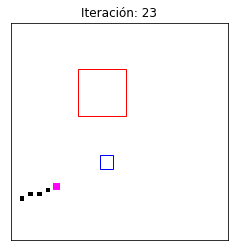

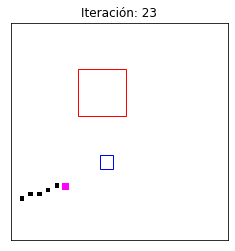

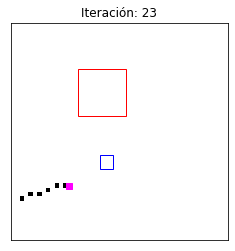

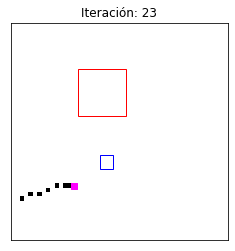

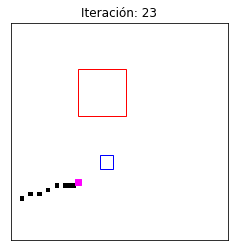

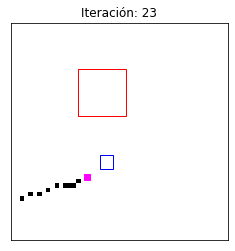

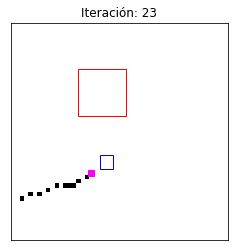

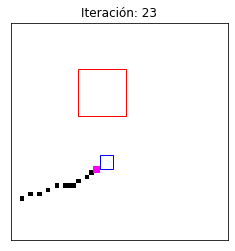

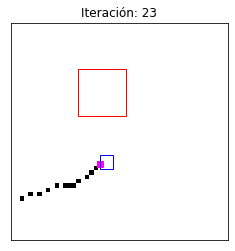

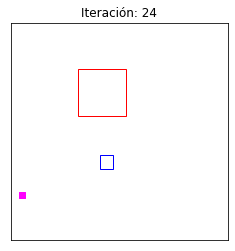

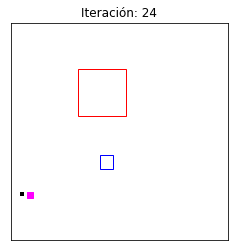

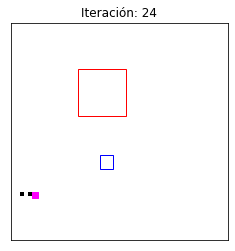

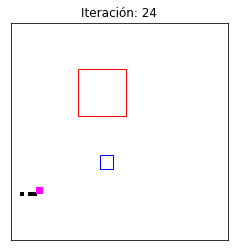

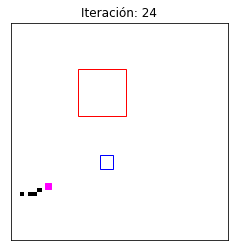

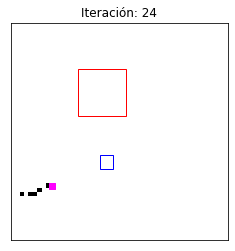

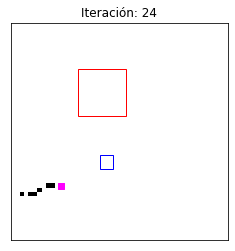

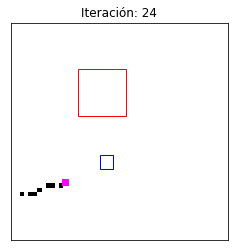

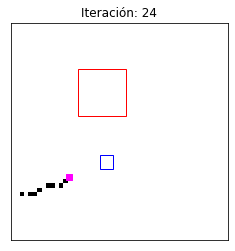

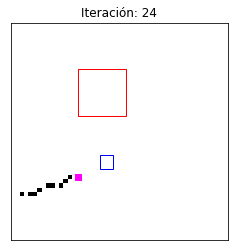

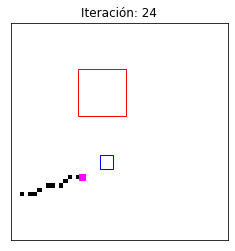

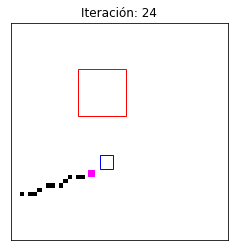

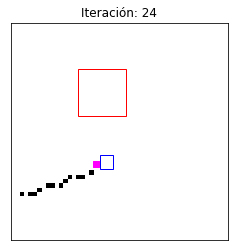

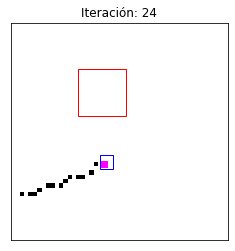

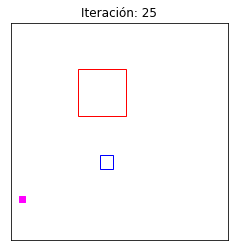

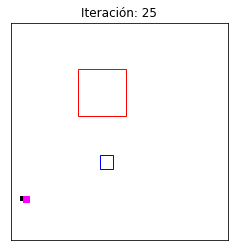

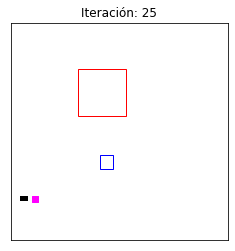

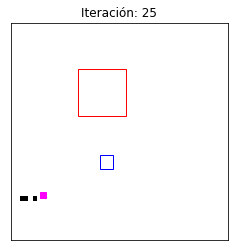

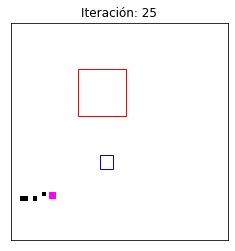

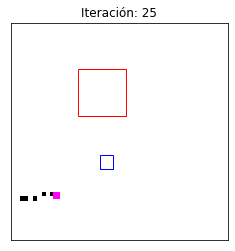

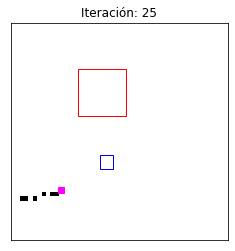

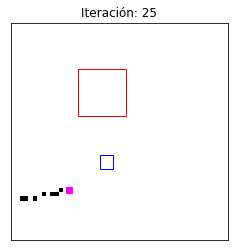

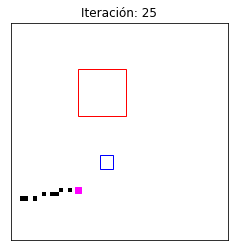

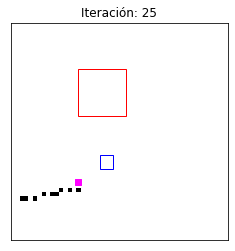

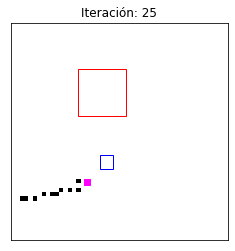

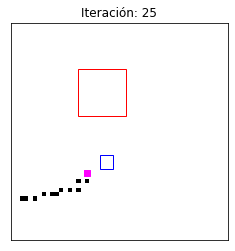

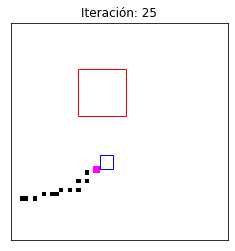

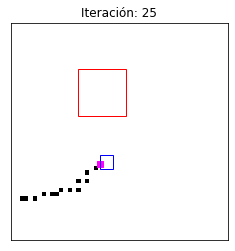

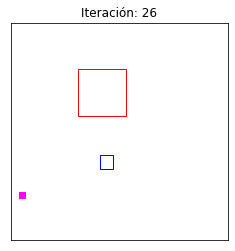

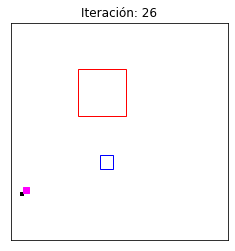

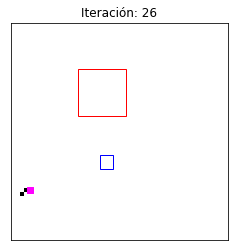

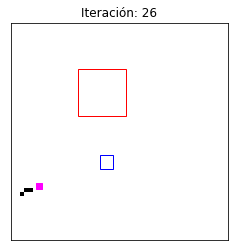

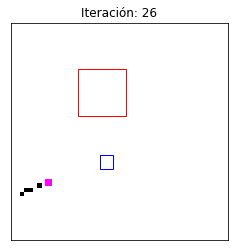

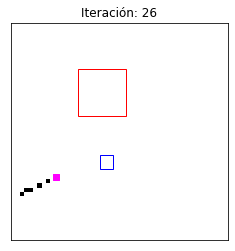

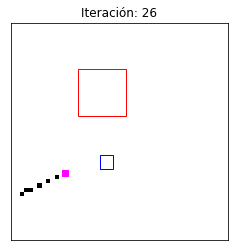

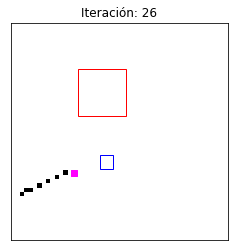

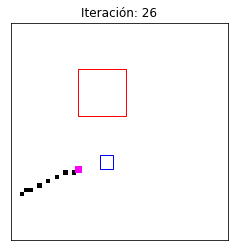

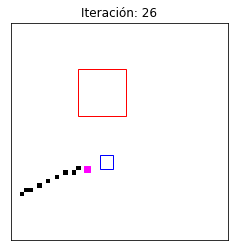

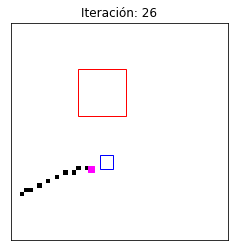

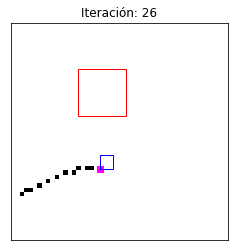

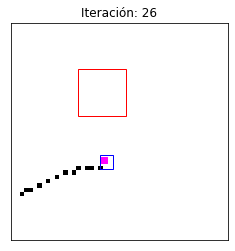

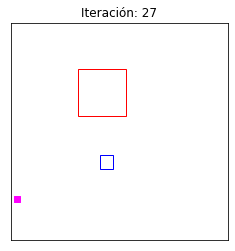

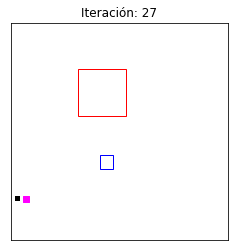

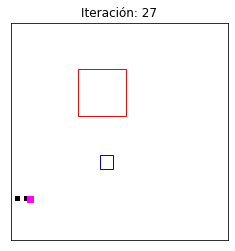

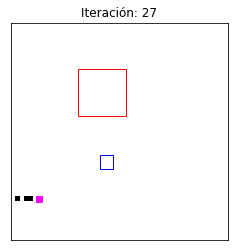

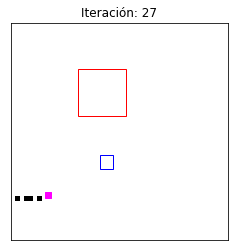

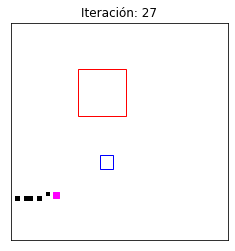

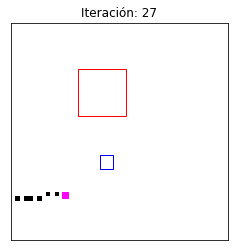

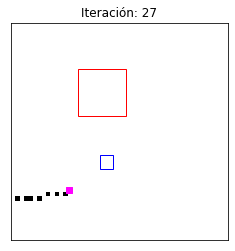

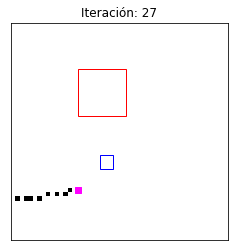

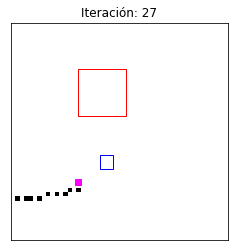

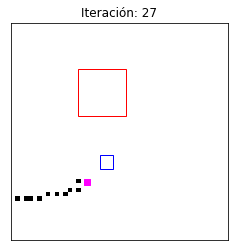

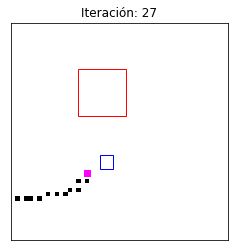

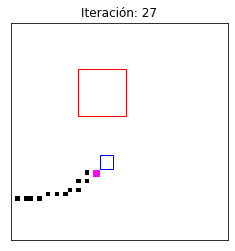

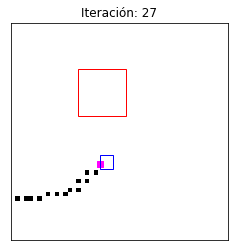

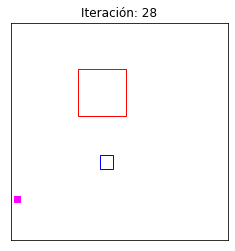

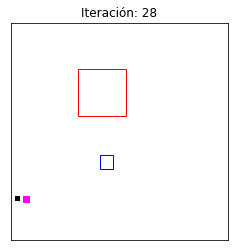

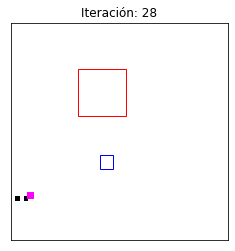

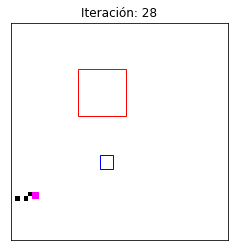

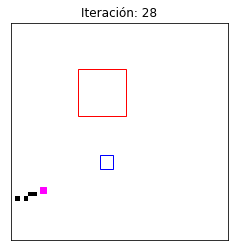

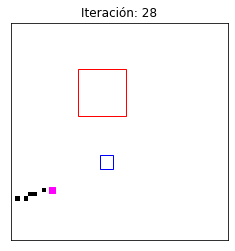

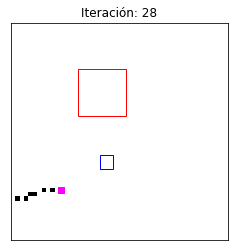

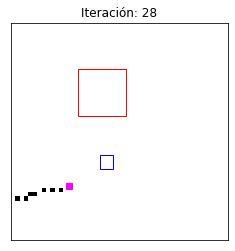

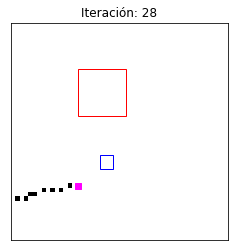

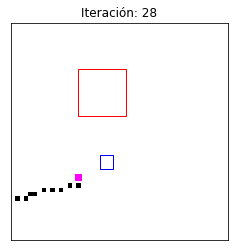

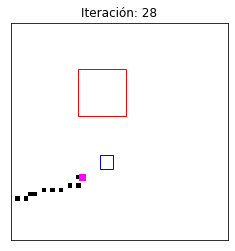

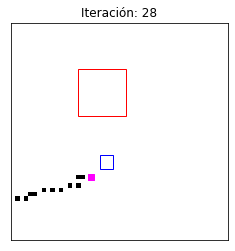

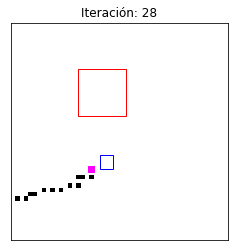

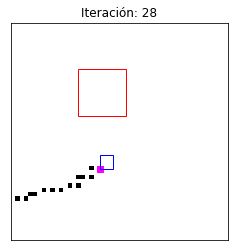

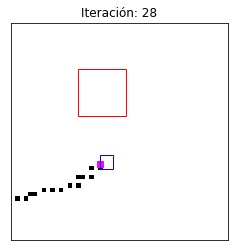

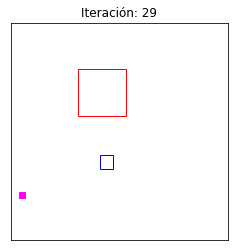

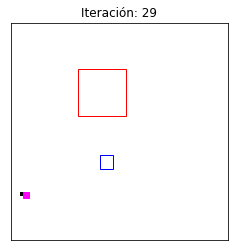

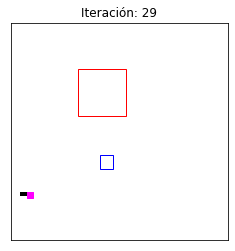

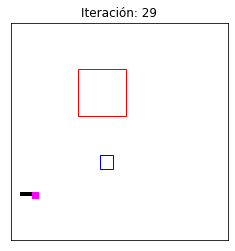

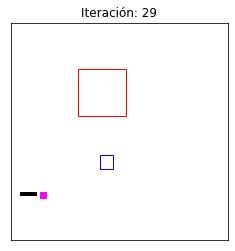

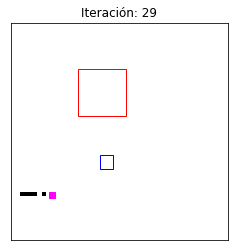

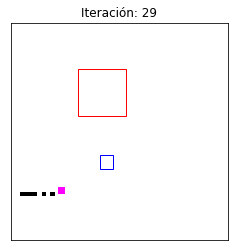

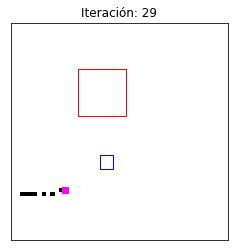

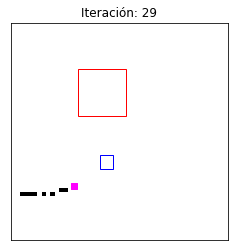

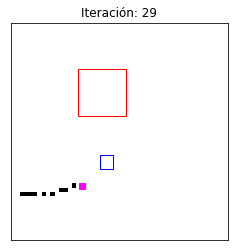

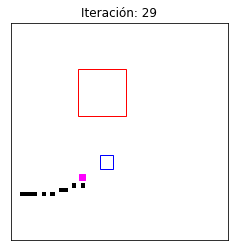

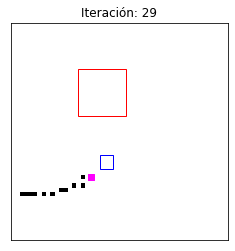

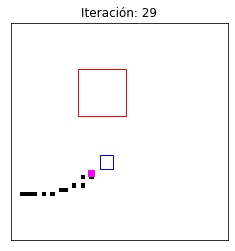

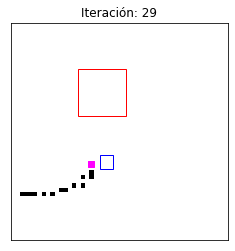

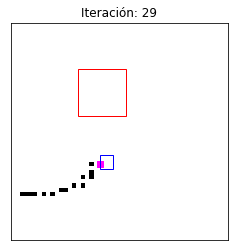

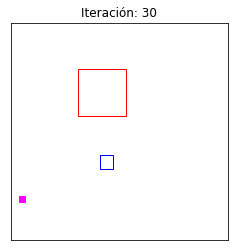

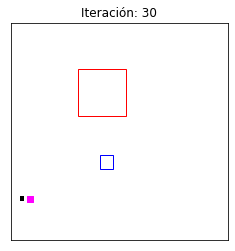

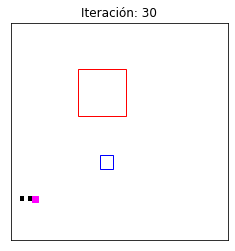

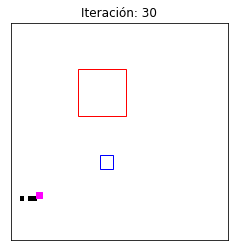

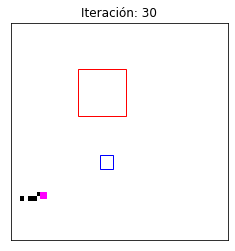

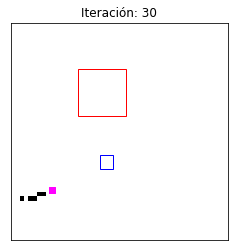

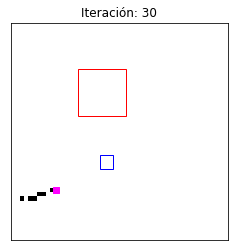

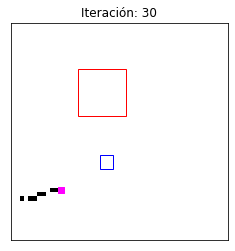

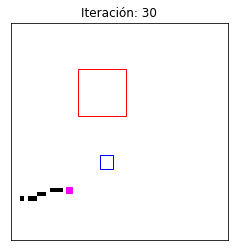

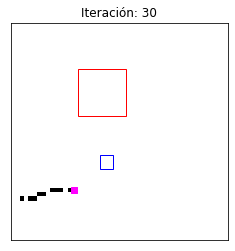

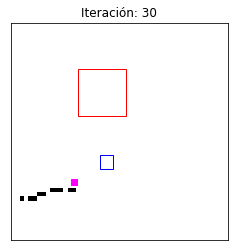

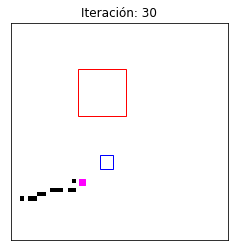

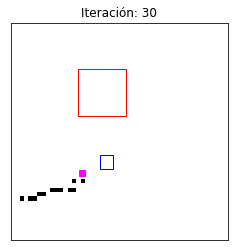

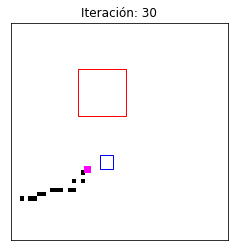

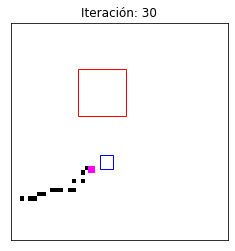

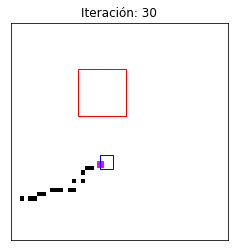

In [26]:
itt=0
for j in range(30): 
    path = np.zeros((n_gridR,n_gridR))
    partic  = [40,0]
    for i in range(2000):
        plt.figure()
        partic = evolucion_temporal(partic, policyR[helpp(partic)])
        path[helpp(partic)] = 1
        xx,yy = helpp(partic)
        plt.scatter(yy,xx, c = 'magenta', marker='s')
        plt.xticks([])
        plt.yticks([])
        ax = plt.gca()
        rect = matplotlib.patches.Rectangle((20,30),3,3,linewidth=1,edgecolor='b',facecolor='none')        # Add the patch to the Axes
        rect2 = matplotlib.patches.Rectangle((15,10),numProhibido2,numProhibido2,linewidth=1,edgecolor='r',facecolor='none')  
        
        ax.add_patch(rect)
        ax.add_patch(rect2)
        plt.title("Iteración: {}".format(j+1))
        plt.imshow(-path, cmap='gray');
       
        if xx in range(30,33) and yy in range(20,23):
            break
        print(i,j)
        clear_output(wait=True)
        
        itt+=1
        plt.savefig("firstTry{}.png".format(str(itt).zfill(6)))
